In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import gender_guesser.detector as gender
from tqdm.notebook import tqdm

In [2]:
df = pd.read_csv('citations_data.csv')
df

authfull                                        inst_name  \
0           Grätzel, Michael  Ecole Polytechnique Federale de Lausanne (EPFL)   
1             Witten, Edward                   Institute for Advanced Studies   
2           Halliwell, Barry                 National University of Singapore   
3           Barnes, Peter J.                          Imperial College London   
4         Kessler, Ronald C.                               Harvard University   
...                      ...                                              ...   
105021      Fujita, Shinsaku                                              NaN   
105022         Fujii, Yusaku                                 Gunma University   
105023     Hamad, Mahmoud A.                                              NaN   
105024  Romaniuk, Ryszard S.                  Warsaw University of Technology   
105025       Mikhailov, O.V.                                              NaN   

       cntry  np6017  firstyr  lastyr  rank (ns)  nc9617 (ns)  h17 (ns)  \
0        che    1375     1971    2018          1       206305       202   
1        usa     271     1976    2018          2        72291       117   
2        sgp     663     1965    2018          3        86198       140   
3        gbr    1615     1979    2016          4       102198       155   
4        usa     759     1976    2018          5       154243       185   
...      ...     ...      ...     ...        ...          ...       ...   
105021   NaN     143     1996    2018     560409          192         7   
105022   jpn     180     2003    2016     594964          270         8   
105023   NaN      59     2010    2018     621615          154         7   
105024   pol     393     1981    2018     695641         4859         9   
105025   NaN     240     1982    2017    1228896          133         4   

        hm17 (ns)  ...  cprat   sm-1                             name1  \
0         94.8608  ...  2.849  153.0                 General Chemistry   
1         95.0833  ...  1.684  175.0        Nuclear & Particle Physics   
2         92.8957  ...  1.375   86.0  Biochemistry & Molecular Biology   
3         99.3009  ...  1.886  124.0                Respiratory System   
4         74.3319  ...  1.611  123.0                        Psychiatry   
...           ...  ...    ...    ...                               ...   
105021     6.3333  ...  8.189  165.0               General Mathematics   
105022     5.8611  ...  3.231  176.0                            Optics   
105023     7.0000  ...  5.458  173.0                   General Physics   
105024     3.8698  ...  1.678  175.0        Nuclear & Particle Physics   
105025     3.2000  ...  6.063  154.0     Inorganic & Nuclear Chemistry   

         frac1   sm-2                         name2   frac2  sm22  \
0       0.1539   16.0  Nanoscience & Nanotechnology  0.1436  19.0   
1       0.7661  174.0          Mathematical Physics  0.1210  22.0   
2       0.5367  113.0      Neurology & Neurosurgery  0.0772  14.0   
3       0.4182  122.0       Pharmacology & Pharmacy  0.2087  15.0   
4       0.6353  141.0                 Public Health  0.0714  15.0   
...        ...    ...                           ...     ...   ...   
105021  0.2806  171.0              Chemical Physics  0.2734  19.0   
105022  0.2152   15.0                     Materials  0.1519  22.0   
105023  0.5217  169.0               Applied Physics  0.1739  22.0   
105024  0.5893   83.0  General Science & Technology  0.0714  22.0   
105025  0.5971  153.0             General Chemistry  0.1942  19.0   

                     name22  frac22  
0                 Chemistry  0.4494  
1       Physics & Astronomy  0.9516  
2       Biomedical Research  0.6309  
3         Clinical Medicine  0.8688  
4         Clinical Medicine  0.7447  
...                     ...     ...  
105021            Chemistry  0.4460  
105022  Physics & Astronomy  0.4304  
105023  Physics & Astronomy  0.8043  
105024  Physics & Astronomy  0.7143  
105025    

In [3]:
df = df[['authfull', 'cntry', 'nc9617 (ns)']]
df

authfull cntry  nc9617 (ns)
0           Grätzel, Michael   che       206305
1             Witten, Edward   usa        72291
2           Halliwell, Barry   sgp        86198
3           Barnes, Peter J.   gbr       102198
4         Kessler, Ronald C.   usa       154243
...                      ...   ...          ...
105021      Fujita, Shinsaku   NaN          192
105022         Fujii, Yusaku   jpn          270
105023     Hamad, Mahmoud A.   NaN          154
105024  Romaniuk, Ryszard S.   pol         4859
105025       Mikhailov, O.V.   NaN          133

[105026 rows x 3 columns]

In [4]:
df = df.drop(df[df['authfull'] != df['authfull']].index)
df

authfull cntry  nc9617 (ns)
0           Grätzel, Michael   che       206305
1             Witten, Edward   usa        72291
2           Halliwell, Barry   sgp        86198
3           Barnes, Peter J.   gbr       102198
4         Kessler, Ronald C.   usa       154243
...                      ...   ...          ...
105021      Fujita, Shinsaku   NaN          192
105022         Fujii, Yusaku   jpn          270
105023     Hamad, Mahmoud A.   NaN          154
105024  Romaniuk, Ryszard S.   pol         4859
105025       Mikhailov, O.V.   NaN          133

[105026 rows x 3 columns]

In [5]:
gender_detector = gender.Detector(case_sensitive=False)

def get_gender(row):
    gender = gender_detector.get_gender(row['authfull'].split(', ')[1].split(' ')[0].split(' ')[0])
    return 1 if gender in ['female'] else 0 if gender in ['male'] else -1

df['gender'] = df.apply(get_gender, axis=1)
df

authfull cntry  nc9617 (ns)  gender
0           Grätzel, Michael   che       206305       0
1             Witten, Edward   usa        72291       0
2           Halliwell, Barry   sgp        86198       0
3           Barnes, Peter J.   gbr       102198       0
4         Kessler, Ronald C.   usa       154243       0
...                      ...   ...          ...     ...
105021      Fujita, Shinsaku   NaN          192       0
105022         Fujii, Yusaku   jpn          270       0
105023     Hamad, Mahmoud A.   NaN          154       0
105024  Romaniuk, Ryszard S.   pol         4859       0
105025       Mikhailov, O.V.   NaN          133      -1

[105026 rows x 4 columns]

In [6]:
df = df.drop(df[df['gender'] < 0].index)
df

authfull cntry  nc9617 (ns)  gender
0           Grätzel, Michael   che       206305       0
1             Witten, Edward   usa        72291       0
2           Halliwell, Barry   sgp        86198       0
3           Barnes, Peter J.   gbr       102198       0
4         Kessler, Ronald C.   usa       154243       0
...                      ...   ...          ...     ...
105019      Makrlík, Emanuel   cze          617       0
105021      Fujita, Shinsaku   NaN          192       0
105022         Fujii, Yusaku   jpn          270       0
105023     Hamad, Mahmoud A.   NaN          154       0
105024  Romaniuk, Ryszard S.   pol         4859       0

[80210 rows x 4 columns]

In [7]:
df['n_usa'] = df.apply(lambda row: 0 if row['cntry'] == 'usa' else 1, axis=1)
df

authfull cntry  nc9617 (ns)  gender  n_usa
0           Grätzel, Michael   che       206305       0      1
1             Witten, Edward   usa        72291       0      0
2           Halliwell, Barry   sgp        86198       0      1
3           Barnes, Peter J.   gbr       102198       0      1
4         Kessler, Ronald C.   usa       154243       0      0
...                      ...   ...          ...     ...    ...
105019      Makrlík, Emanuel   cze          617       0      1
105021      Fujita, Shinsaku   NaN          192       0      1
105022         Fujii, Yusaku   jpn          270       0      1
105023     Hamad, Mahmoud A.   NaN          154       0      1
105024  Romaniuk, Ryszard S.   pol         4859       0      1

[80210 rows x 5 columns]

In [8]:
df = df.drop(df[(df['nc9617 (ns)'] != df['nc9617 (ns)'])].index)
df['citations'] = df['nc9617 (ns)']
df

authfull cntry  nc9617 (ns)  gender  n_usa  citations
0           Grätzel, Michael   che       206305       0      1     206305
1             Witten, Edward   usa        72291       0      0      72291
2           Halliwell, Barry   sgp        86198       0      1      86198
3           Barnes, Peter J.   gbr       102198       0      1     102198
4         Kessler, Ronald C.   usa       154243       0      0     154243
...                      ...   ...          ...     ...    ...        ...
105019      Makrlík, Emanuel   cze          617       0      1        617
105021      Fujita, Shinsaku   NaN          192       0      1        192
105022         Fujii, Yusaku   jpn          270       0      1        270
105023     Hamad, Mahmoud A.   NaN          154       0      1        154
105024  Romaniuk, Ryszard S.   pol         4859       0      1       4859

[80210 rows x 6 columns]

In [9]:
df = df[['gender', 'n_usa', 'citations']]
df

gender  n_usa  citations
0            0      1     206305
1            0      0      72291
2            0      1      86198
3            0      1     102198
4            0      0     154243
...        ...    ...        ...
105019       0      1        617
105021       0      1        192
105022       0      1        270
105023       0      1        154
105024       0      1       4859

[80210 rows x 3 columns]

In [10]:
df['citations'] = np.log(df['citations'])
df = df[df['citations'] != float("-inf")]

/var/folders/hz/c57j2mh55558shdvbn4gwp2m0000gn/T/ipykernel_1517/15158813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['citations'] = np.log(df['citations'])


In [11]:
df.to_csv('processed_data.csv', index=False)

<AxesSubplot:>

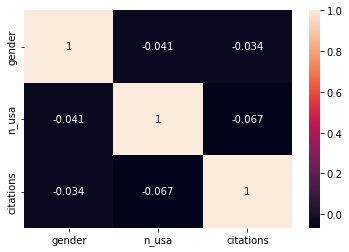

In [12]:
import seaborn as sns

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True,
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns)

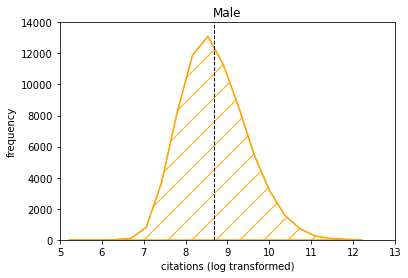

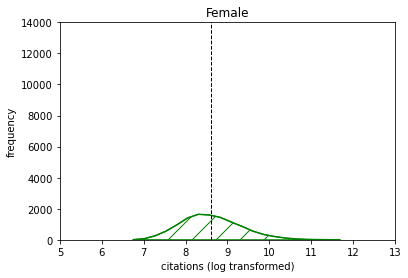

In [34]:
color = ['orange', 'green']
shape = ['o', '*']

summary = {
    (0, 0): {'mean': 0, 'std': 0, 'count': 0},
    (0, 1): {'mean': 0, 'std': 0, 'count': 0},
    (1, 0): {'mean': 0, 'std': 0, 'count': 0},
    (1, 1): {'mean': 0, 'std': 0, 'count': 0}
}

title = ['Male', "Female"]

for i in [0, 1]:
    subset = df[(df['gender'] == i)]['citations']
    # summary[(i, j)] = {'mean': np.mean(subset), 'std': np.std(subset), 'count': subset.shape[0]}
    y, binEdges = np.histogram(subset, bins=20)
    bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
    plt.plot(bincenters, y, '-', c=color[i])
    plt.fill(bincenters, y, hatch='/', fill=False, color=color[i])
    plt.axvline(subset.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.title(title[i])
    plt.ylabel('frequency')
    plt.xlabel('citations (log transformed)')
    plt.axis([5, 13, 0, 14000])
    plt.show()

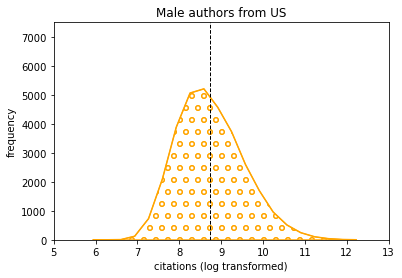

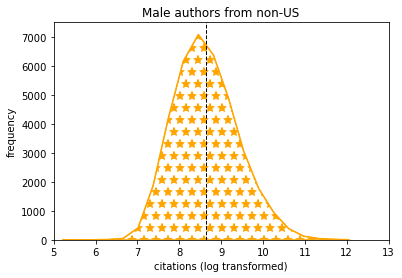

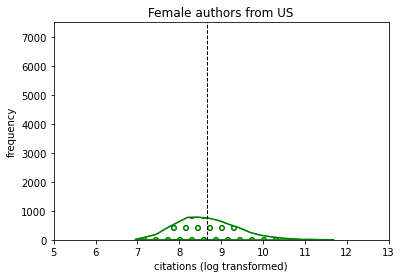

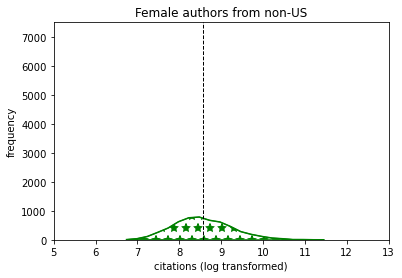

In [36]:
color = ['orange', 'green']
shape = ['o', '*']

summary = {
    (0, 0): {'mean': 0, 'std': 0, 'count': 0},
    (0, 1): {'mean': 0, 'std': 0, 'count': 0},
    (1, 0): {'mean': 0, 'std': 0, 'count': 0},
    (1, 1): {'mean': 0, 'std': 0, 'count': 0}
}

title = [['Male authors from US', 'Male authors from non-US'], ['Female authors from US', 'Female authors from non-US']]
 # = ['White Males', 'White Females', 'Black Males', 'Black Females']

for i in [0, 1]:
    for j in [0, 1]:
        subset = df[(df['gender'] == i) & (df['n_usa'] == j)]['citations']
        summary[(i, j)] = {'mean': np.mean(subset), 'std': np.std(subset), 'count': subset.shape[0]}

        y, binEdges = np.histogram(subset, bins=20)
        bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
        plt.plot(bincenters, y, '-', c=color[i])
        plt.fill(bincenters, y, hatch=shape[j], fill=False, color=color[i])
        plt.axvline(subset.mean(), color='k', linestyle='dashed', linewidth=1)
        plt.title(title[i][j])
        plt.ylabel('frequency')
        plt.xlabel('citations (log transformed)')
        plt.axis([5, 13, 0, 7500])
        plt.show()

In [37]:
summary

{(0, 0): {'mean': 8.744956295310187,
  'std': 0.7901225572250021,
  'count': 31569},
 (0, 1): {'mean': 8.637855315261765,
  'std': 0.7581431242227405,
  'count': 37369},
 (1, 0): {'mean': 8.654641157707633, 'std': 0.7293126818013451, 'count': 5827},
 (1, 1): {'mean': 8.564721656122162, 'std': 0.6953764934386046, 'count': 5445}}

In [13]:
def sample_size(population, size):
    if size is None:
        cochran_n = round(((1.96)**2 * 0.5 * 0.5)/ 0.02**2)
        n = round(cochran_n/(1+((cochran_n -1) /population)))
    elif size >= 0 and size < 1:
        n = round(population * size)
    elif size < 0:
        raise ValueError('Parameter "size" must be an integer or a proportion between 0 and 0.99.')
    elif size >= 1:
        n = size
    return n

def sample(df, strata, size=None, seed=None, keep_index= True):
    population = len(df)
    size = sample_size(population, size)
    tmp = df[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int)

    # controlling variable to create the dataframe or append to it
    first = True
    for i in range(len(tmp_grpd)):
        # query generator for each iteration
        qry=''
        for s in range(len(strata)):
            stratum = strata[s]
            value = tmp_grpd.iloc[i][stratum]
            n = tmp_grpd.iloc[i]['samp_size']

            if type(value) == str:
                value = "'" + str(value) + "'"

            if s != len(strata)-1:
                qry = qry + stratum + ' == ' + str(value) +' & '
            else:
                qry = qry + stratum + ' == ' + str(value)

        # final dataframe
        if first:
            stratified_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            first = False
        else:
            tmp_df = df.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            stratified_df = stratified_df.append(tmp_df, ignore_index=True)

    return stratified_df.sample(frac=1).reset_index(drop=True)

In [14]:
def df_to_operating_tuple(df):
    return [(item['citations'], (int(item['gender']), int(item['n_usa']))) for index, item in df.iterrows()]

In [15]:
# return individuals with top percieved qualities
def getTop(df, top = 0.1):
    data = df.copy().sort_values(['citations'], ascending=[0])
    items = data[:int(data.shape[0] * top)]
    return df_to_operating_tuple(items)

# return individuals top individuals after debiasing
def getTopDebiased(df, top = 0.1):
    # Debiasing is always on the visible (first) attribute
    # Allocate proportional quotas
    df_q0 = df[(df['gender'] == 0)].copy().sort_values(['citations'], ascending=[0])
    df_q1 = df[(df['gender'] == 1)].copy().sort_values(['citations'], ascending=[0])

    items_q0 = df_q0[:int(df_q0.shape[0] * top)]
    items_q1 = df_q1[:int(df_q1.shape[0] * top)]

    return df_to_operating_tuple(items_q0) + df_to_operating_tuple(items_q1)

In [16]:
# Compute chances to be in top k% for aggregated groups before and after debiasing
# d => fixed biases []
# f => number of elements
def get_aggregated(data, N, Nsim, k_range):
    results = {'original': {0: [], 1: []},
               'debiased': {0: [], 1: []}}

    # shapes(invisible) => 0: circle; 1: stars
    # colors(visible) => 0: orange; 1: green
    groups = [0, 1]

    for k in tqdm(k_range, desc='K%'):
        simulations = {'original': {0: [], 1: []},
                       'debiased': {0: [], 1: []}}

        for i in tqdm(range(0, Nsim), desc='Simulation'):
            # properties, perceived qualities and real qualities
            df_gen = sample(data, ['gender', 'n_usa'], N)
            for group in groups:
                # compute expected chances to be in top
                exp = df_gen[(df_gen['gender'] == group)].shape[0] / df_gen.shape[0]
                for approach in ['original', 'debiased']:
                    if approach == 'original':
                        top = getTop(df_gen, k)
                    else:
                        top = getTopDebiased(df_gen, k)
                    # compute real chances to be in top
                    real = len([x for x in top if x[1][0] == group]) / len(top)
                    simulations[approach][group].append((real - exp) / exp)
        for group in [0, 1]:
            for approach in ['original', 'debiased']:
                results[approach][group].append(np.mean(simulations[approach][group]))
    return results

In [17]:
def plot_aggregated(results):
    colors = ['orange', 'green']
    styles = {'original': '-', 'debiased': '--'}

    for approach in ['original', 'debiased']:
        for group in [0, 1]:
            plt.plot(k_range, results[approach][group], color = colors[group], ls = styles[approach])
    plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
    plt.xlabel('top k')
    plt.ylabel('representation bias')

In [18]:
# for quick results
Nsim = 5
print('Number of Simulations : ', Nsim)

# to fetch top k% candidates
k_range = [i / 100 for i in range(1, 101, 5)]
print('Ranking Indexes : ', k_range)

Number of Simulations :  5
Ranking Indexes :  [0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51, 0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]


K%:   0%|          | 0/20 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

Simulation:   0%|          | 0/5 [00:00<?, ?it/s]

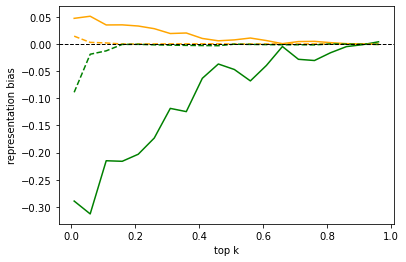

In [19]:
results_agg = get_aggregated(df, 4000, Nsim, k_range)
plot_aggregated(results_agg)

In [20]:
# Compute chances to be in top k% for disaggregated groups before and after debiasing
def get_disaggregated(data, N, Nsim, k_range):
    groups = [(0,0),(0,1),(1,0),(1,1)]

    results = {'original': {g:[] for g in groups},
               'debiased': {g:[] for g in groups}}

    for k in k_range:
        simulations = {'original': {g:[] for g in groups},
                       'debiased': {g:[] for g in groups}}

        for i in tqdm(range(0, Nsim), desc='Simulations for Top {}'.format(k*100)):
            df_gen = sample(data, ['gender', 'n_usa'], N)

            for g in groups:
                # compute expected chances to be in top
                # exp = len([x for x in a if x == g]) / len(q)
                exp = df_gen[(df_gen['gender'] == g[0]) & (df_gen['n_usa'] == g[1])].shape[0] / df_gen.shape[0]
                for approach in ['original', 'debiased']:
                    if approach == 'original':
                       top = getTop(df_gen, k)
                    else:
                       top = getTopDebiased(df_gen, k)

                    # compute real chances to be in top
                    real = len([x for x in top if x[1] == g]) / len(top)
                    simulations[approach][g].append((real - exp) / exp)

        for g in groups:
            for approach in ['original', 'debiased']:
                results[approach][g].append(np.mean(simulations[approach][g]))
    return results

In [21]:
def plot_disaggregated(results):
    groups = [(0,0),(0,1),(1,0),(1,1)]
    fill = {'original': 'full', 'debiased': 'none'}
    colors = ['orange', 'green']
    shapes = ['o', '*']
    for g in groups:
        for approach in ['original', 'debiased']:
            plt.plot(k_range, results[approach][g], shapes[g[1]], color = colors[g[0]], lw = 2, fillstyle = fill[approach])
    plt.axhline(0, color='k', linestyle='dashed', linewidth=1)
    plt.fill_between(k_range, results['debiased'][(0,1)], results['original'][(0,1)], color='orange', alpha=.25)
    plt.xlabel('top k')
    plt.ylabel('representation bias')

Simulations for Top 1.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 6.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 11.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 16.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 21.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 26.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 31.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 36.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 41.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 46.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 51.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 56.00000000000001:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 61.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 66.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 71.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 76.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 81.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 86.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 91.0:   0%|          | 0/5 [00:00<?, ?it/s]

Simulations for Top 96.0:   0%|          | 0/5 [00:00<?, ?it/s]

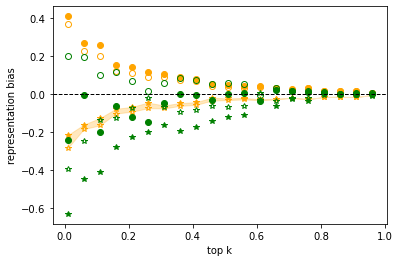

In [22]:
results = get_disaggregated(df, 4000, Nsim, k_range)
plot_disaggregated(results)

In [23]:
np.save('results_citations_main.npy', {'agg': results_agg, 'diss_agg': results})

In [24]:
read_dictionary = np.load('results_citations_main.npy', allow_pickle='TRUE').item()
read_dictionary

{'agg': {'original': {0: [0.047382198952879644,
    0.05126139228233477,
    0.035215638055952264,
    0.03538094458987791,
    0.033250851824150315,
    0.028359231664205516,
    0.019414466400195236,
    0.02038947870208786,
    0.01034063338015585,
    0.006018191820320295,
    0.007677514286692088,
    0.011118668453419838,
    0.006459888993791718,
    0.0007437155146579983,
    0.004601799277339471,
    0.0049662824163376204,
    0.00262780183712902,
    0.0007642186506487781,
    0.0001924515275301364,
    -0.0006834308949000547],
   1: [-0.2893428063943161,
    -0.3130313795145056,
    -0.21504682706281283,
    -0.21605628330372997,
    -0.20304871859934023,
    -0.17317768820877172,
    -0.11855583567295018,
    -0.12450981843299783,
    -0.06314582160031187,
    -0.03675052127577421,
    -0.04688329328178872,
    -0.06789694874397363,
    -0.03944777683953063,
    -0.004541552290220127,
    -0.028101218322367578,
    -0.03032696083013926,
    -0.016046860952130322,
    -0.004